In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

### Basic Understanding of given data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observations:
1. We observe that the given data has 891 number of rows and 12 columns.
2. Also columns like PassengerID, Survived, Pclass, Age, SibSp, Parch, and Fare are numerical type.
3. Columns Age, Cabin, Embarked contain missing values.
4. Cabin column has maximum number of missing values

### Data Cleaning- Handling Missing Values

In [8]:
med_age=df.Age.median()
df.loc[df.Age.isnull()==True, 'Age']=med_age

In [9]:
emb_mode=df.Embarked.mode()
df.loc[df.Embarked.isnull(), 'Embarked']=emb_mode[0]


In [10]:
df=df.drop(columns=['Cabin'])

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df.duplicated().sum()

0

### UNIVARIATE ANALYSIS
Univariate analysis examines each feature individually to understand its distribution.

### Survival Distribution

Text(0.5, 1.0, "Plot of number of people survived vs number of people that didn't survive")

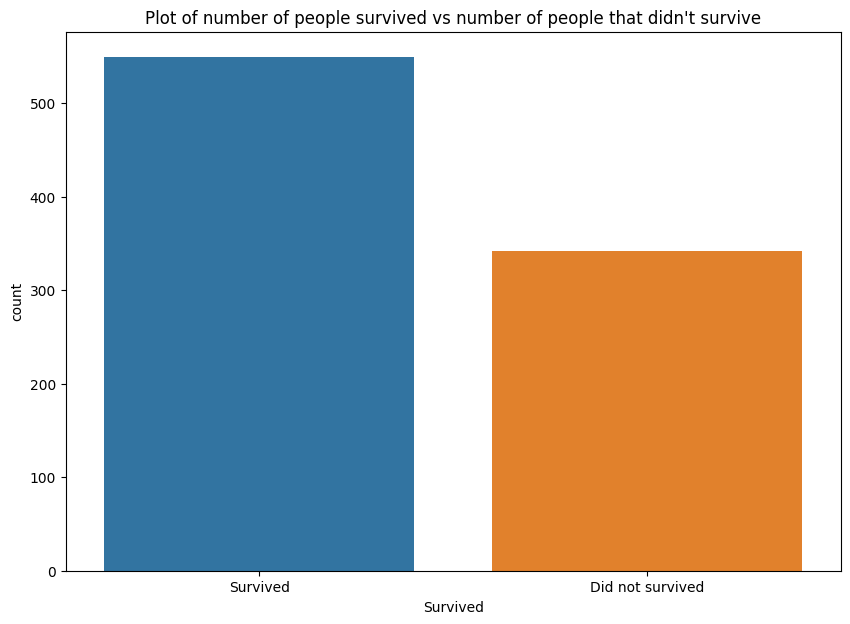

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x='Survived', data=df)
plt.xticks(ticks=[0,1], labels=['Survived', 'Did not survived'])
plt.title("Plot of number of people survived vs number of people that didn't survive")

#### Above plot clearly shows that the number of people that did not survived is significantly greater than the number of survivors. This indicates that the target variable is imbalanced.

### Gender Distribution


Text(0.5, 1.0, 'Plot of number of Male vs number of Female onboard')

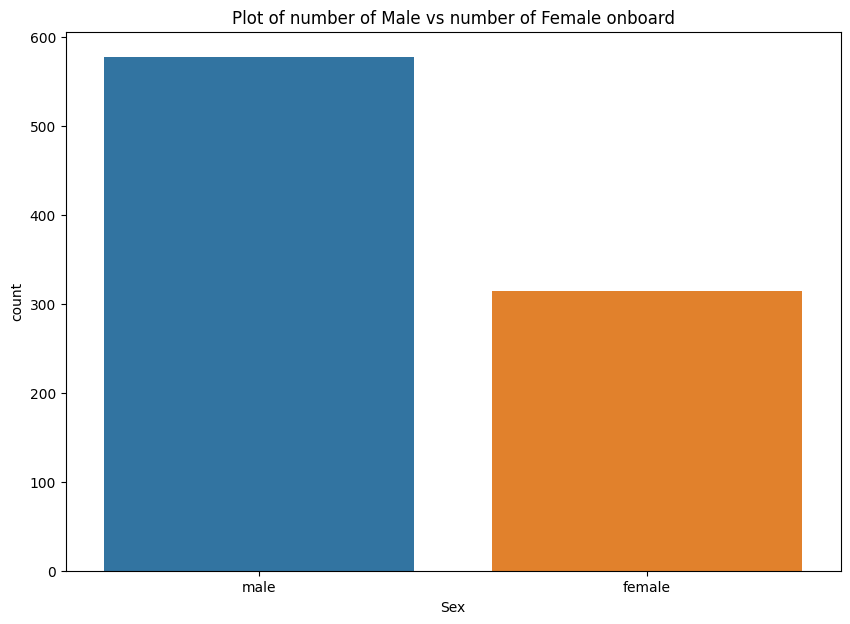

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x='Sex', data=df)
plt.title('Plot of number of Male vs number of Female onboard')

#### Above plot clearly shows that the number of males are higher than number of females onboard

### Passenger Class Distribution


Text(0.5, 1.0, 'Plot of number of passengers in each class')

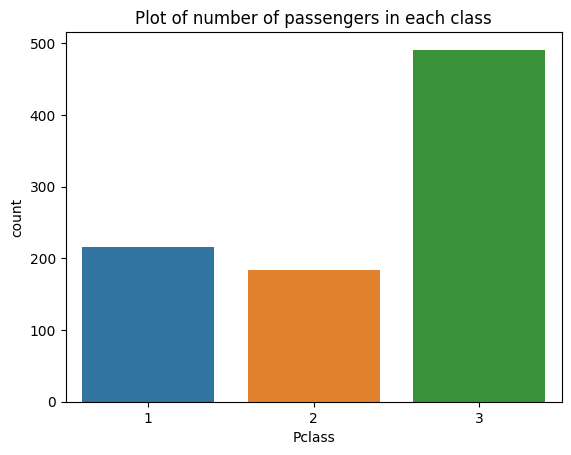

In [15]:
sns.countplot(x='Pclass', data=df)
plt.title('Plot of number of passengers in each class')


* Most of the passengers belonged to the 3rd class.
* Also 1st class has fewer passengers than 3rd class.
* The 2nd class has least number of passengers.
* The dataset is skewed towards lower socio-economic passengers


###  Passenger Class Distribution


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distrubtion of Age')

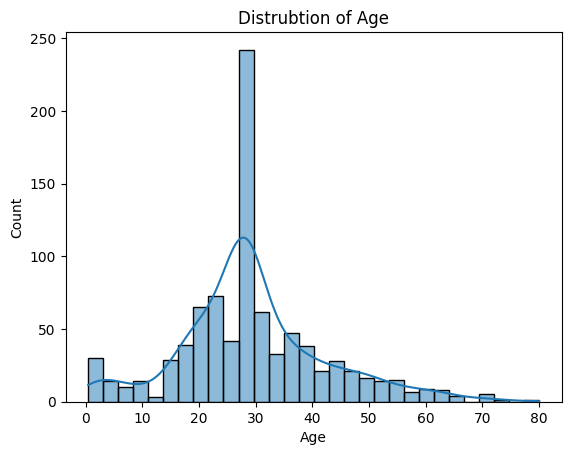

In [16]:
sns.histplot(x='Age', data=df, kde=True)
plt.title('Distrubtion of Age')

* The distribution is right skewed mostly around 20 to 40 years indicating most people belonged to this age range.
* Highest concentration of passenger is around 30.
* Very few people belong in the above 60 age range
  

### BIVARIATE ANALYSIS

### Survival vs Gender


Text(0.5, 1.0, 'Probability of survival for male vs female passengers')

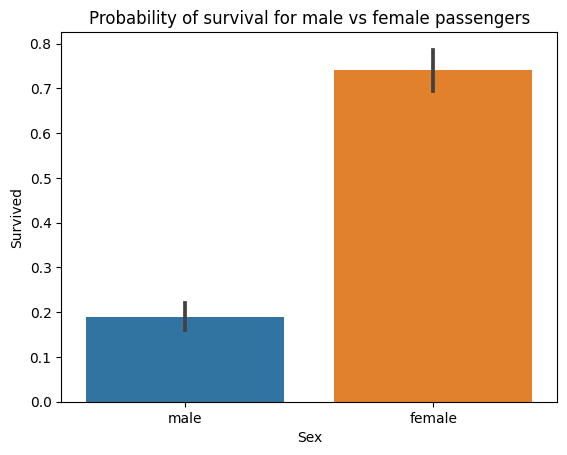

In [17]:
sns.barplot(y='Survived', x='Sex', data=df)
plt.title('Probability of survival for male vs female passengers')

* The female passengers have a significantly higher probability rate than the male passengers.
* Only about 20% of the male passengers survived.
* This indicates that the gender was a major factor in survival of the Titanic
* This supports the historical “women and children first” evacuation policy.
  

### Survival vs Class


Text(0.5, 1.0, 'Probability of survival across different classes')

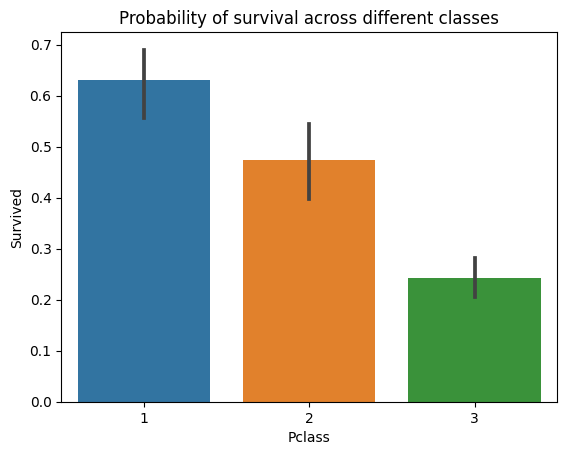

In [18]:
sns.barplot(y='Survived', x='Pclass', data=df)
plt.title('Probability of survival across different classes')

* Passengers travelling in 1st class have highest chance of survival.
* Passengers in 3rd have least survival rate.
* This shows that socio-economic status strongly influenced survival.
* Higher-class passengers likely had better access to lifeboats and safety measures.

### Survival vs Age


Text(0.5, 1.0, 'Age distribution for survivors vs non-survivors')

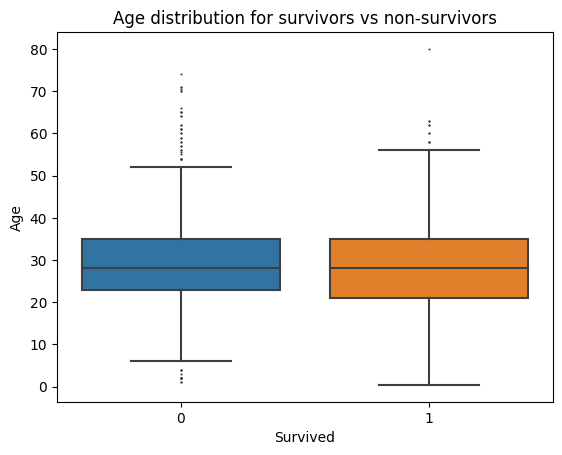

In [19]:
sns.boxplot(y='Age', x='Survived', data=df, fliersize=0.6)
plt.title('Age distribution for survivors vs non-survivors')

* The median age of survivors is slightly lower than that of the non-survivors.
* A higher proportion of children survived indicating that the children had higher survival priority.
* However, there is a significant overlap between age groups, indicating that age alone is not a strong determinant of survival.

### Survival vs Fare

<Axes: xlabel='Survived', ylabel='Fare'>

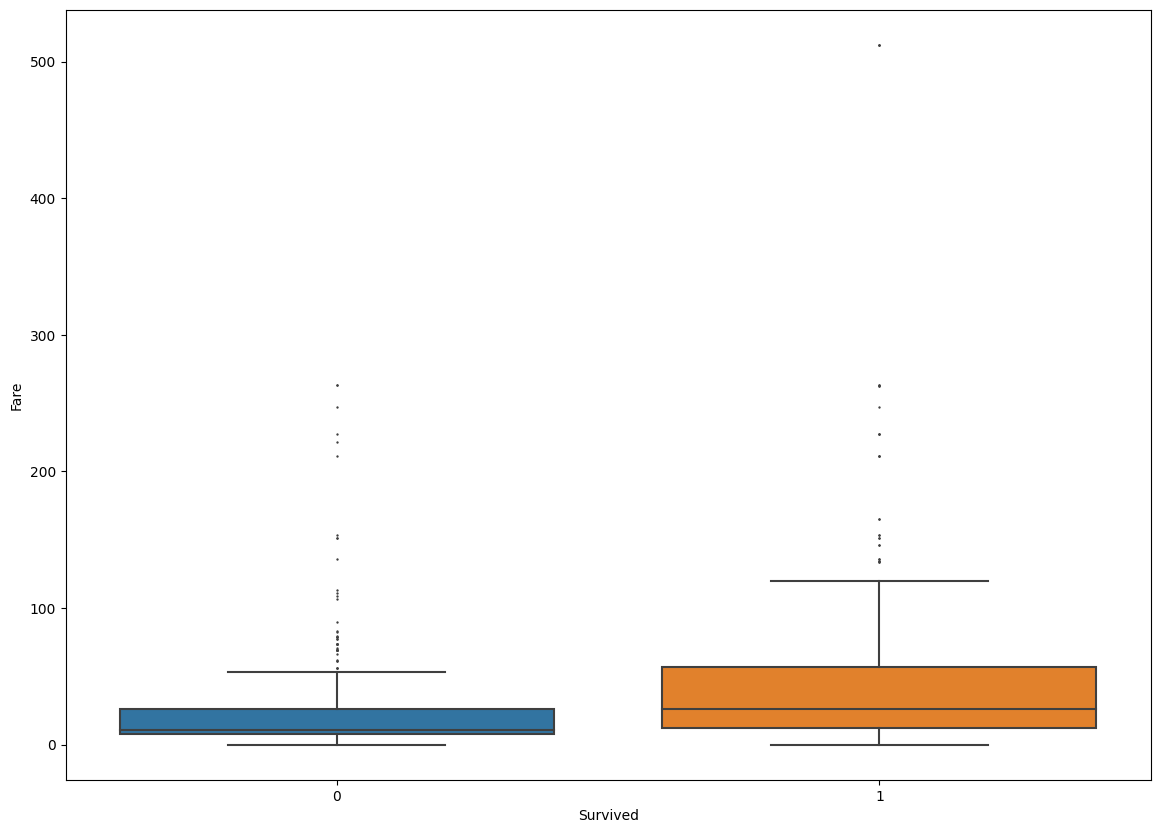

In [20]:
plt.figure(figsize=(14,10))
sns.boxplot(y='Fare', x='Survived', data=df, fliersize=0.8)

* The median fare of survivors is much greater than that of non-survivors indicating that the people who paid more had better chances of survival.
* Non-survivors are havily concentrated at very low fares.
* High-fare passengers show a much higher possibility of survival.
* This confirms that wealth and class played an important role in survival.

## Correlation Analysis

Correlation analysis helps identify relationships between numeric variables.


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

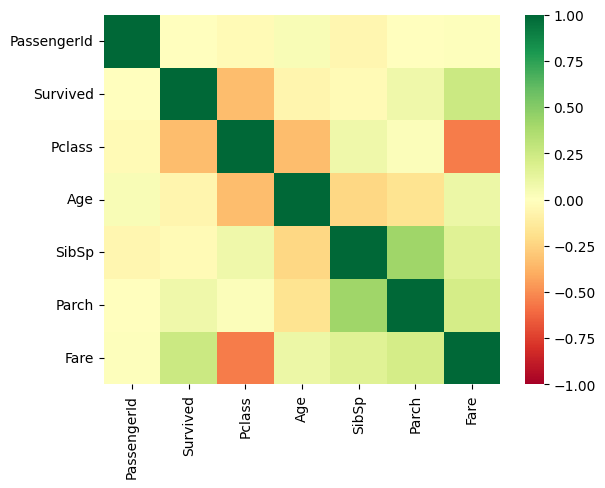

In [21]:
corr_data=df.select_dtypes(include=np.number).corr()
sns.heatmap(data=corr_data, cmap='RdYlGn', vmin=-1, vmax=1, center=0)

* Survival has a strong negative correlation with Passenger class indicating passenger is lower classes had lower survival chances.
* Survival has a positive correlation with fare indicating that passenger who paid a higher fare had better survival possibility.
* Age has very weak almost no correlation with survival indicating it was not a major factor of survivability.
* Fare and Pclass show a strong negative correlation, confirming that higher-class passengers paid significantly higher fares.

## Multivariate Analysis: Survival by Gender and Class


Text(0.5, 1.0, 'Probability of survival across different classes and gender')

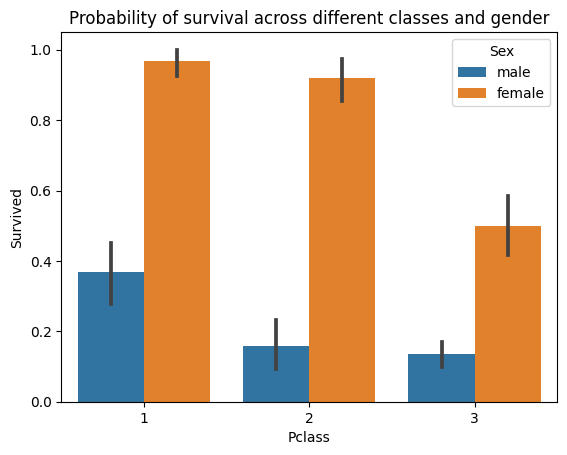

In [22]:
sns.barplot(y='Survived', x='Pclass', hue='Sex', data=df)
plt.title('Probability of survival across different classes and gender')

* Survival probability varies significantly across both gender and passenger class.
* Females consistently show much higher survival rates than males in every class.
* Even third-class females had a higher survival chance than first-class males.
* First-class females represent the most protected group, while third-class males represent the most vulnerable group.
* These patterns confirm that both social class and gender strongly influenced survival outcomes on the Titanic.

## CONCLUSION:


#### From the analysis, the following conclusions were drawn:
#### 1. Females had a consistently higher survival probability across all passenger classes.
#### 2. First-class females had the highest survival likelihood overall.
#### 3. Third-class males had the lowest survival likelihood.
#### 4. The “women first” policy combined with economic status clearly shaped survival outcomes.